In [3]:
import torch
import torchaudio.datasets as datasets

In [5]:
dataset = datasets.LJSPEECH("../data")

In [8]:
dataset[0], len(dataset[0]), len(dataset)

((tensor([[-7.3242e-04, -7.6294e-04, -6.4087e-04,  ...,  7.3242e-04,
            2.1362e-04,  6.1035e-05]]),
  22050,
  'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition',
  'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition'),
 4,
 13100)

In [9]:
waveform, sample_rate, transcript, normalized_transcript = dataset[0]

In [15]:
waveform.shape, waveform.dtype

(torch.Size([1, 212893]), torch.float32)

In [16]:
import torchaudio.transforms as T

In [18]:
T.Resample(sample_rate, 16000, dtype=waveform.dtype)(waveform).shape

torch.Size([1, 154481])

In [21]:
waveform.max(), waveform.min()

(tensor(0.8649), tensor(-0.6792))

In [33]:
waveform[:,:1000].shape

torch.Size([1, 1000])

In [22]:
import matplotlib.pyplot as plt

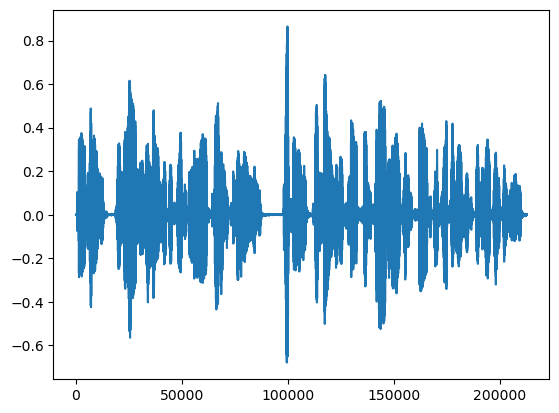

In [39]:
plt.plot(waveform.squeeze(0), )

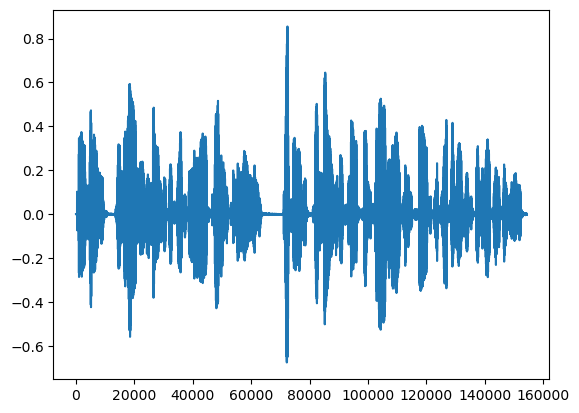

In [42]:
plt.plot(T.Resample(sample_rate, 16000, dtype=waveform.dtype)(waveform).squeeze(0))

In [58]:
torch.sign(torch.arange(-5, 6)), torch.arange(-5, 6)

(tensor([-1, -1, -1, -1, -1,  0,  1,  1,  1,  1,  1]),
 tensor([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5]))

In [56]:
torch.log(torch.arange(1, 6))

tensor([0.0000, 0.6931, 1.0986, 1.3863, 1.6094])

In [59]:
torch.abs_(torch.arange(-5, 6))

tensor([5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5])

In [66]:
mu = 256-1

In [106]:
numerator = torch.log(1 + (mu *  torch.abs_(waveform)))
denominator = torch.log(torch.tensor(1 + mu))
x = torch.sign(waveform) * numerator / denominator
torch.floor(((x + 1) * (mu + 0.5)) / 2)

tensor([[131., 131., 131.,  ..., 131., 128., 128.]])

In [184]:
def muLaw(inputs, quantatize_categories=256):
    mu = quantatize_categories -  1
    out = torch.log(1 + (mu *  torch.abs_(inputs))) / torch.log(torch.tensor(1 + mu)) * torch.sign(inputs)
    return torch.floor(((out + 1) * (mu + 0.5)) / 2).to(torch.int64)

In [148]:
x = muLaw(waveform)
x

tensor([[131, 131, 131,  ..., 131, 128, 128]], dtype=torch.int16)

In [138]:
temp = (2 * (x - 0.5) / mu) - 1
torch.sign(temp) / mu * ((1 + mu) ** torch.abs(temp) - 1)

tensor([[0.0005, 0.0005, 0.0005,  ..., 0.0005, 0.0000, 0.0000]])

In [129]:
torch.log(1 + (mu *  torch.abs_(waveform))) / torch.log(torch.tensor(1 + mu)) * torch.sign(waveform)

tensor([[0.0309, 0.0321, 0.0273,  ..., 0.0309, 0.0096, 0.0028]])

In [139]:
def decodeMuLaw(inputs, quantatize_categories=256):
    mu = quantatize_categories - 1
    out = (2 * (x - 0.5) / mu) - 1
    return torch.sign(out) / mu * ((1 + mu) ** torch.abs(out) - 1)

In [185]:
out = muLaw(waveform)
out

tensor([[131, 131, 131,  ..., 131, 128, 128]])

In [186]:
quantatize_categories=256
out_channel = 32

embeddings = nn.Embedding(quantatize_categories, out_channel)(out)

In [187]:
embeddings[:,1,:]

tensor([[-0.0824,  1.2574, -0.2440,  0.1192,  0.2797,  1.0202,  1.0973, -0.4864,
         -1.6737, -0.8921,  0.3502,  0.9149, -0.5677, -1.4364, -2.5617, -0.9545,
         -1.6095,  0.5877, -0.0241,  0.6353, -1.3115, -0.7577,  1.0764,  0.2126,
         -0.4074,  0.4846, -0.5083, -1.0676, -1.3845,  1.0674,  0.1362, -0.3015]],
       grad_fn=<SliceBackward0>)

In [188]:
import torch.nn.functional as f

In [194]:
embedded_out = f.one_hot(out, 256)
embedded_out[:,1]

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [195]:
embedded_out.shape

torch.Size([1, 212893, 256])

In [205]:
import torch.nn.functional as f

def muLaw(inputs, quantatize_categories=256):
    mu = quantatize_categories -  1
    out = torch.log(1 + (mu *  torch.abs_(inputs))) / torch.log(torch.tensor(1 + mu)) * torch.sign(inputs)
    return torch.floor(((out + 1) * (mu + 0.5)) / 2).to(torch.int64)

def decodeMuLaw(inputs, quantatize_categories=256):
    mu = quantatize_categories - 1
    out = (2 * (inputs - 0.5) / mu) - 1
    return torch.sign(out) / mu * ((1 + mu) ** torch.abs(out) - 1)

def preprocess(inputs, quantatize_categories=256):
    quantized_inputs = muLaw(inputs, quantatize_categories)
    return f.one_hot(quantized_inputs, quantatize_categories)
    

In [206]:
preprocess(waveform)

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]])